In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(font_scale=1.5)
plt.rcParams['font.family'] = 'Times New Roman'

In [16]:
df = pd.read_csv("./example_file/srs_mg.TXT", sep='\t')
df.head()


,X_Mg_1299_0.005_1_Pd_[nm],Y_Mg_1299_0.005_1_Hardness (H)_[MPa],X_Mg_1299_0.005_2_Pd_[nm],Y_Mg_1299_0.005_2_Hardness (H)_[MPa],X_Mg_1299_0.005_3_Pd_[nm],Y_Mg_1299_0.005_3_Hardness (H)_[MPa],X_Mg_1299_0.02_1_Pd_[nm],Y_Mg_1299_0.02_1_Hardness (H)_[MPa],X_Mg_1299_0.02_2_Pd_[nm],Y_Mg_1299_0.02_2_Hardness (H)_[MPa],...,Y_Mg_1256_0.05_2_Hardness (H)_[MPa],X_Mg_1256_0.05_3_Pd_[nm],Y_Mg_1256_0.05_3_Hardness (H)_[MPa],X_Mg_1256_0.2_1_Pd_[nm],Y_Mg_1256_0.2_1_Hardness (H)_[MPa],X_Mg_1256_0.2_2_Pd_[nm],Y_Mg_1256_0.2_2_Hardness (H)_[MPa],X_Mg_1256_0.2_3_Pd_[nm],Y_Mg_1256_0.2_3_Hardness (H)_[MPa],Unnamed: 80
0,1.715101,11661.658112,42.759525,321.026272,53.067184,188.595488,60.052466,184.291056,59.298172,172.267056,...,224.297920,59.856804,164.504448,38.286268,425.665920,99.447053,97.028784,47.233880,302.095456,NaN
1,2.991551,6134.100480,42.980383,322.503520,53.086962,190.913472,60.481009,188.170704,59.945572,173.951584,...,219.824336,62.484625,158.856928,41.195830,390.814944,104.162172,92.328584,51.500221,252.889728,NaN
2,4.020571,4884.898816,42.783140,331.396160,52.908690,198.176288,60.774292,187.110000,60.464524,178.268864,...,215.394496,64.240370,155.302688,42.624540,378.539264,107.303993,86.993872,53.123701,255.973616,NaN
3,4.938056,4181.521664,42.679905,339.705408,52.923910,202.476768,61.104666,194.592240,60.701256,179.344320,...,219.301248,65.430358,159.871792,44.571999,344.509984,109.998854,86.688624,54.683410,240.515904,NaN
4,6.345077,3554.475008,42.463282,348.876864,52.660004,209.078720,61.457017,197.721904,60.846043,184.595712,...,217.149408,66.490097,160.090672,46.001579,343.742880,112.121643,82.386528,56.125477,242.377232,NaN


In [17]:
# Experimental cases
strainRates = [0.2, 0.05, 0.02, 0.005]
repeat = [1,2,3]
# grainIDs = [197,212,190]
dataTypes = [['X','Y'],['Pd_[nm]', 'Hardness (H)_[MPa]']]
Materials = ['Mg']

# combine the conditions into case_name
def case(grainID,sr,r,dT):
    conditions = f"{dataTypes[0][dT]}_{Materials[0]}_{grainID}_{sr}_{r}_{dataTypes[1][dT]}"
    return conditions

print(case(190,0.2,1,1))
print(case(190,0.2,1,0))

Y_Mg_190_0.2_1_Hardness (H)_[MPa]
X_Mg_190_0.2_1_Pd_[nm]


(0.0, 1450.0)

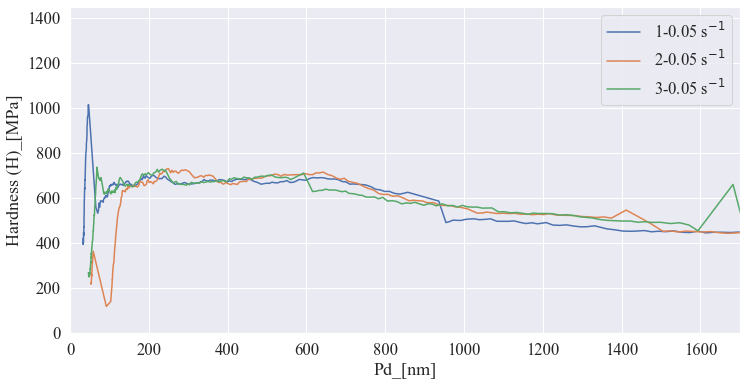

In [19]:
plt.figure(figsize = (12,6))

sr = 0.05
grainID = 1299

for i in range(1,4):
    x = df[case(grainID,sr,i,0)]
    y = df[case(grainID,sr,i,1)]
    plt.plot(x,y,label = f"{i}-{sr}"+" s$^{-1}$")

plt.legend()
plt.xlabel("Pd_[nm]")
plt.ylabel("Hardness (H)_[MPa]")
plt.xlim([0, 1700])
plt.ylim([0, 1450])

In [26]:
sr = 0.2
grainID = 1299
def sscurve(data, sr, grainID,color):
    
    df = data
    df_merged = pd.DataFrame() # create empty DataFrame

    df1 = df[case(grainID,sr,1,0)]
    df2 = df[case(grainID,sr,2,0)]
    df3 = df[case(grainID,sr,3,0)]
#     df4 = df[case(grainID,sr,4,0)]

    frames = [df2, df1, df3] # df1 was removed
    df_merged['Pd'] = pd.concat(frames)

    df1 = df[case(grainID,sr,1,1)]
    df2 = df[case(grainID,sr,2,1)]
    df3 = df[case(grainID,sr,3,1)]
#     df4 = df[case(grainID,sr,4,1)]

    frames = [df2, df1, df3]
    df_merged['Hardness'] = pd.concat(frames)

    df_merged.sort_values(by=['Pd'], axis=0, inplace=True)
    df_merged.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')

    x = df_merged['Pd']
    y = df_merged['Hardness']

    i = 0
    lim = len(x)
    window_size = 20
    
    # Initialize an empty list to store moving averages
    moving_avgX = []
    moving_avgY = []
    moving_stdY = []

    # Loop through the array t o
    #consider every window of size 3
    while i < lim - window_size + 1:
    
        # Calculate the average of current window
        window_avg = round(np.sum(y[i:i+window_size]) / window_size, 2) # i, i+1, ... i+window_size-1
        window_std = round(np.std(y[i:i+window_size])) 

        # Store the average of current
        # window in moving average list
        moving_avgY.append(window_avg)
        moving_stdY.append(window_std)
        moving_avgX.append(x[i]+window_size/2)
        
        # Shift window to right by one position
        i += 1

    df = pd.DataFrame ({'x':moving_avgX,'mean': moving_avgY,'std': moving_stdY})

    plt.plot(df['x'], df['mean'], f'{color}-', label=f'{grainID}_{sr}')
    plt.fill_between(df['x'], df['mean'] - df['std'], df['mean'] + df['std'], color=f'{color}', alpha=0.2)
    plt.xlabel('Pd (Nm)')
    plt.ylabel('Hardness (MPa)')
    plt.legend()
    plt.xlim([0,1900])
    plt.ylim([-50,1500])

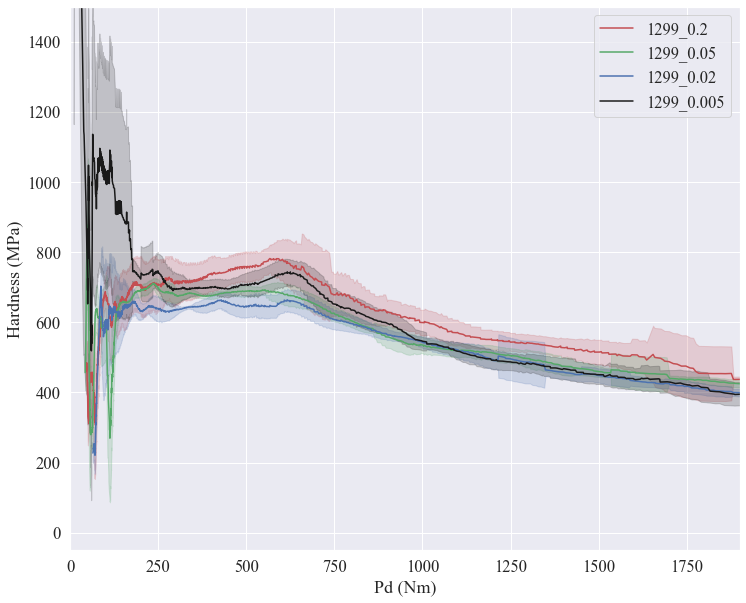

In [27]:
plt.figure(figsize = (12,10))
sscurve(data = df, sr = 0.2, grainID = 1299, color = 'r')
sscurve(data = df, sr = 0.05, grainID = 1299, color = 'g')
sscurve(data = df, sr = 0.02, grainID = 1299, color = 'b')
sscurve(data = df, sr = 0.005, grainID = 1299, color = 'k')

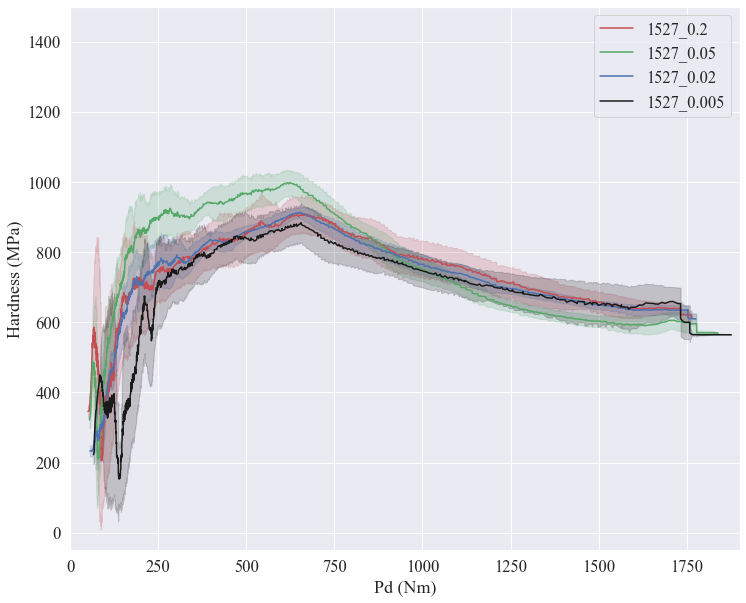

In [28]:
plt.figure(figsize = (12,10))
sscurve(data = df, sr = 0.2, grainID = 1527, color = 'r')
sscurve(data = df, sr = 0.05, grainID = 1527, color = 'g')
sscurve(data = df, sr = 0.02, grainID = 1527, color = 'b')
sscurve(data = df, sr = 0.005, grainID = 1527, color = 'k')

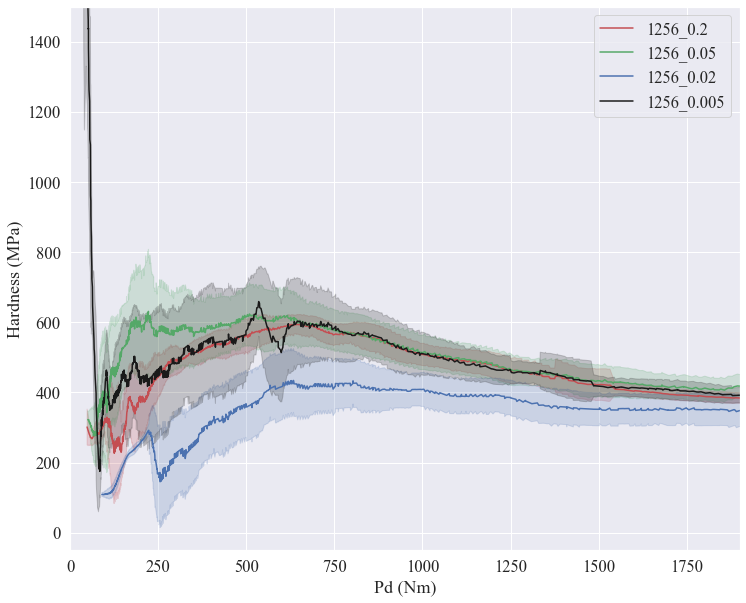

In [29]:
plt.figure(figsize = (12,10))
sscurve(data = df, sr = 0.2, grainID = 1256, color = 'r')
sscurve(data = df, sr = 0.05, grainID = 1256, color = 'g')
sscurve(data = df, sr = 0.02, grainID = 1256, color = 'b')
sscurve(data = df, sr = 0.005, grainID = 1256, color = 'k')

In [32]:
sr = 0.2
grainID = 190
def combined_df(data, sr, grainID):
    
    df = data
    df_merged = pd.DataFrame() # create empty DataFrame

    df1 = df[case(grainID,sr,1,0)]
    df2 = df[case(grainID,sr,2,0)]
    df3 = df[case(grainID,sr,3,0)]
#     df4 = df[case(grainID,sr,4,0)]

    frames = [df2, df1, df3] # df1 was removed
    df_merged['Pd'] = pd.concat(frames)

    df1 = df[case(grainID,sr,1,1)]
    df2 = df[case(grainID,sr,2,1)]
    df3 = df[case(grainID,sr,3,1)]
#     df4 = df[case(grainID,sr,4,1)]

    frames = [df2, df1, df3]
    df_merged['Hardness'] = pd.concat(frames)

    df_merged.sort_values(by=['Pd'], axis=0, inplace=True)
    df_merged.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')

    x = df_merged['Pd']
    y = df_merged['Hardness']

    i = 0
    lim = len(x)
    window_size = 20
    
    # Initialize an empty list to store moving averages
    moving_avgX = []
    moving_avgY = []
    moving_stdY = []

    # Loop through the array t o
    #consider every window of size 3
    while i < lim - window_size + 1:
    
        # Calculate the average of current window
        window_avg = round(np.sum(y[i:i+window_size]) / window_size, 2) # i, i+1, ... i+window_size-1
        window_std = round(np.std(y[i:i+window_size])) 

        # Store the average of current
        # window in moving average list
        moving_avgY.append(window_avg)
        moving_stdY.append(window_std)
        moving_avgX.append(x[i]+window_size/2)
        
        # Shift window to right by one position
        i += 1

    df = pd.DataFrame ({'x':moving_avgX,'mean': moving_avgY,'std': moving_stdY})
    return df

0.01352254532132979


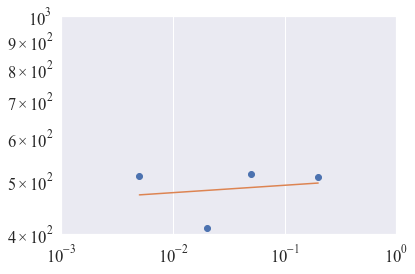

In [37]:
df1 = combined_df(df, 0.2, 1256)
df2 = combined_df(df, 0.05, 1256)
df3 = combined_df(df, 0.02, 1256)
df4 = combined_df(df, 0.005, 1256)

new_df = [df1, df2, df3, df4]

length_df = len(df1)
pd_point = 1000 # get index at this depth point

lst_strainRate = [0.2, 0.05, 0.02, 0.005]
lst_Pd = []
lst_Hardness = []

for j in range(0,4):
    for i in range(length_df):
        if new_df[j]['x'][i] >= pd_point:
            idx_point = i
            lst_Pd.append(new_df[j]['x'][i])
            lst_Hardness.append(new_df[j]['mean'][i])
            break

df2 = pd.DataFrame({"strainRate": lst_strainRate,
                    "Pd": lst_Pd,
                    "Hardness": lst_Hardness})  


# for scatter
x = df2["strainRate"]
y = df2["Hardness"]

# for line fitting
# m, b = np.polyfit(np.log10(x), np.log10(y), 1) # m = slope, b = intercept
m, b = np.polyfit(np.log10(x), np.log10(y), 1) # m = slope, b = intercept

plt.plot(x, y, 'o') # create scatter plot
plt.plot(x, (10**(b))*(x**(m))) # add line of best fit

plt.xscale('log')
plt.yscale('log')

plt.ylim([4*10**2, 10**3])
plt.xlim([10**(-3), 10**(0)])
print(m)